In [16]:
import scipy.io
import numpy as np
import gtsam
from gtsam.utils.plot import plot_trajectory
import matplotlib.pyplot as plt

In [17]:
# Step 1: Load the data from hw4_data.mat
mat = scipy.io.loadmat('hw4_data.mat')
dposes = mat['dpose'][0]  # Noisy odometry measurements (1*49 cell, each cell is 4x4 double)
traj3 = mat['traj3'][0]  # Initial trajectory estimate (1*50 cell, each cell is 4x4 double)
poses3_gt = mat['poses3_gt'][0]  # Ground truth poses (1*50 cell, each cell is 4x4 double)

In [18]:
# Step 2: Convert transformation matrices to gtsam.Pose3 objects
initial_trajectory = gtsam.Values()
ground_truth_trajectory = gtsam.Values()

# Helper function to convert 4x4 matrix to gtsam.Pose3
def mat_to_pose3(matrix):
    R = gtsam.Rot3(matrix[:3, :3])  # Rotation part
    t = gtsam.Point3(matrix[:3, 3])  # Translation part
    return gtsam.Pose3(R, t)

# Convert initial trajectory (traj3)
for i, T in enumerate(traj3):
    pose = mat_to_pose3(T)
    initial_trajectory.insert(gtsam.symbol('x', i), pose)

# Convert ground truth trajectory (poses3_gt)
for i, T in enumerate(poses3_gt):
    pose = mat_to_pose3(T)
    ground_truth_trajectory.insert(gtsam.symbol('x', i), pose)

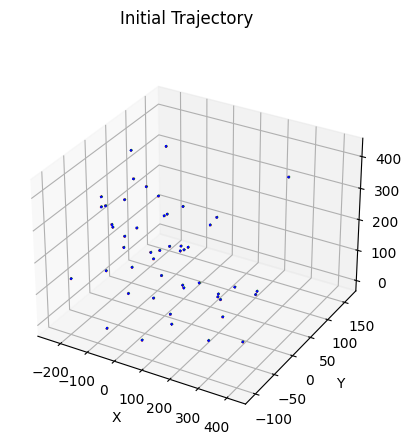

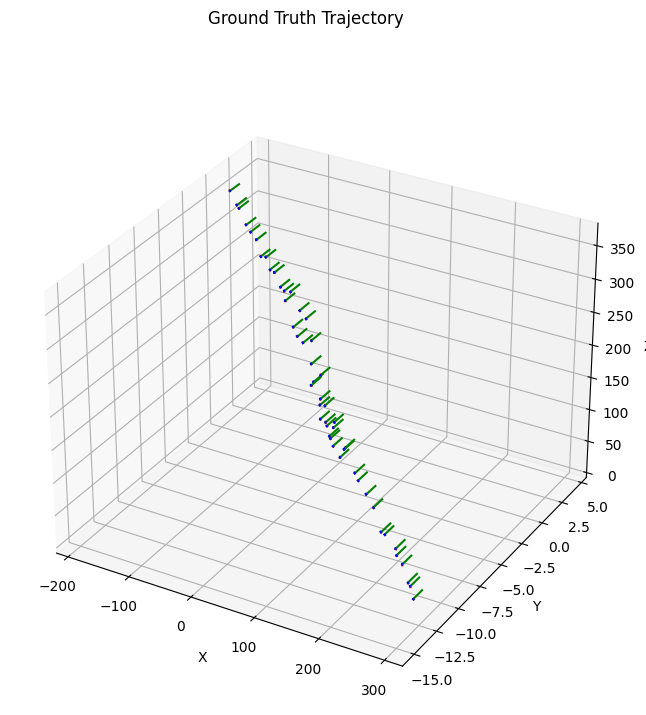

In [19]:
# Step 3: Plot the initial trajectory
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
plot_trajectory(0, initial_trajectory, scale=1, title="Initial Trajectory", axis_labels=("X", "Y", "Z"))

# Plot the ground truth trajectory
plot_trajectory(1, ground_truth_trajectory, scale=1, title="Ground Truth Trajectory", axis_labels=("X", "Y", "Z"))


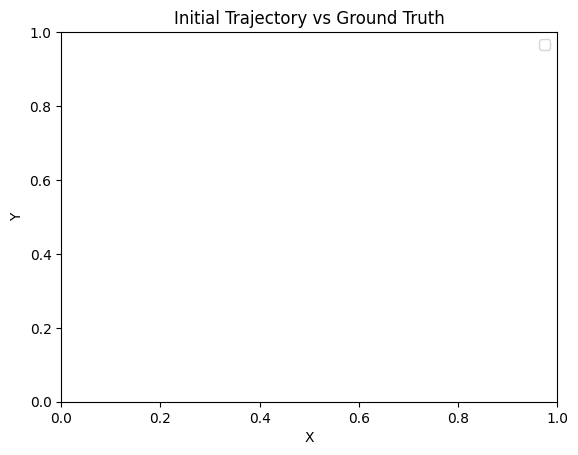

In [20]:
# Step 4: Set plot properties
plt.legend(["Initial Trajectory", "Ground Truth"])
plt.title("Initial Trajectory vs Ground Truth")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()